## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
# Get some information about the data type of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [6]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [7]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# how many options do the landing_page variable has
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [9]:
# calculate the mismatch between group and landing_page
df[(df.group == "control") & (df.landing_page == "new_page")]['group'].count() + df[(df.group == "treatment") & (df.landing_page == "old_page")]['group'].count()

3893

f. Do any of the rows have missing values?

In [10]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# get the indexes of the rows where we have a mismatch of the variables group and landing_page
remove_row_idx = df[(df.group == "control") & (df.landing_page == "new_page")].index
remove_row_idx2 = df[(df.group == "treatment") & (df.landing_page == "old_page")].index

In [12]:
# remove the identified rows
df_mod = df.drop(remove_row_idx, axis=0)
df_mod = df_mod.drop(remove_row_idx2, axis=0)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df_mod[((df_mod['group'] == 'treatment') == (df_mod['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df_mod.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df_mod.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
# first reset the index of the dataframe so that you can call the rows with the right index
df_mod.reset_index(inplace=True)

In [17]:
# identify the index of the rows with the repeated user
repeated_user_idx = df_mod[df_mod['user_id'] == 773192].index
print(repeated_user_idx)

Int64Index([1876, 2862], dtype='int64')


In [18]:
# get information about the repeated user
df_mod.query('user_id == "773192"')

,index,user_id,timestamp,group,landing_page,converted
1876,1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# remove the one of the rows of the repeated user
df_mod.drop(repeated_user_idx[0], axis=0, inplace=True)

In [20]:
# check the row was removed successfully 
df_mod[df_mod['user_id'] == 773192]

,index,user_id,timestamp,group,landing_page,converted
2862,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [21]:
# how many rows are there now
df_mod.shape

(290584, 6)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
df_mod.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
df_mod.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
df_mod.query('group == "treatment"')['converted'].mean()

0.11880806551510564

In [70]:
# let us store the difference between control and treatment in a variable for later use
obs_conversion_diff = df_mod.query('group == "control"')['converted'].mean() - df_mod.query('group == "treatment"')['converted'].mean()

d. What is the probability that an individual received the new page?

In [25]:
(df_mod['landing_page'] == "new_page").mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [26]:
# first I want to get a little bit more information about the data.
# transform the timestamp to data type date
df_mod['timestamp'] = pd.to_datetime(df_mod['timestamp'])

In [27]:
# check that the transformation worked
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         290584 non-null  int64         
 1   user_id       290584 non-null  int64         
 2   timestamp     290584 non-null  datetime64[ns]
 3   group         290584 non-null  object        
 4   landing_page  290584 non-null  object        
 5   converted     290584 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 15.5+ MB


In [28]:
# get the time horizon of the experiment
(df_mod['timestamp'].max() - df_mod['timestamp'].min())

Timedelta('21 days 23:59:49.081927')

>Our goal is to verify if a new developed page (new_page) can increase the conversion rate of our customers. The facts:
* Probability a user gets to see the new page: 50%
* Number of observations: 290,584
* Number of days for the experiment: 21 days
* Conversion rate of the old page: 12.0%
* Conversion rate of the new page: 11.9%
>
>From the facts, we can say that there was a fair amount of time to run the experiment and the number of observations seems high enough to conduct an estimation of the population's parameter. 
>
>Regarding the computed probabilites of the conversion rate, it looks like the new developed page decreases it by 0.1%. However, we need to run proper statistical analysis to verify this. In the further analysis we should keep in mind hexogenous factors that could have an impact in the conversion rate as well (e.g. change aversion or the novelty effect)

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>The $H_0$ hypothesis is the condition we belive to be true before collecting the data. In our case, we belive the old page a conversion rate ($p_{old}$) at least as good as the new one:
>
>$$H_0: p_{old} \geq p_{new} \Longrightarrow p_{old} - p_{new} \geq 0$$
>
>The $H_1$ hypothesis is the condition we want to prove true. In our case, we want to prove that the new page has a better conversion rate than the old one:
>
>$$H_1: p_{old} < p_{new}\Longrightarrow p_{old} - p_{new} < 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [29]:
p_new = df_mod['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [30]:
# since p_new and p_old are assume to be equal, we have the same as before
p_old = df_mod['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [31]:
# n means in this case the classical "n" - number of observations
n_new = df_mod.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [33]:
# again, n refers to the number of observations (or rows in our dataframe)
n_old = df_mod.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [58]:
new_page_converted = np.random.binomial(n=1, p=p_new, size=n_new)
new_page_converted.mean()

0.11955818594728511

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [65]:
old_page_converted = np.random.choice([0,1], p=[(1-p_old), p_old], size=n_old)
old_page_converted.mean()

0.1196291146385451

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [67]:
old_page_converted.mean() - new_page_converted.mean()

7.092869125999157e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [68]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.binomial(n=1, p=p_new, size=n_new)
    old_page_converted = np.random.binomial(n=1, p=p_old, size=n_old)
    p_diffs.append(old_page_converted.mean() - new_page_converted.mean())

# check that the loop worked fine
p_diffs[:20]

[0.0002291666446192081,
 1.5798944277584104e-05,
 -0.0013397169547071236,
 0.0009451695012573647,
 0.0002773514540138772,
 -0.0002799103645537704,
 -0.0016841516758262925,
 0.0018124619629232147,
 -0.00040409895724780043,
 -0.0027300411048537254,
 -0.0005897124878170151,
 -0.001429828900785468,
 -0.00025223293651700784,
 -0.0012709394953594327,
 0.0012136618324656706,
 -0.0002663615637588379,
 0.0006008251648490365,
 0.0015989595382012861,
 -0.0015877922892683777,
 -0.0008237598120787032]

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

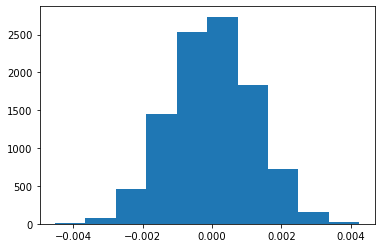

In [69]:
plt.hist(p_diffs);

this is exactly what we are expecting. Because of the central limit theorem, the distribution of the values should approach a normal distribution with a mean of 0 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [84]:
# recall that the observed difference was stored as obs_conversion_diff
(obs_conversion_diff > np.array(p_diffs)).mean()

0.9054

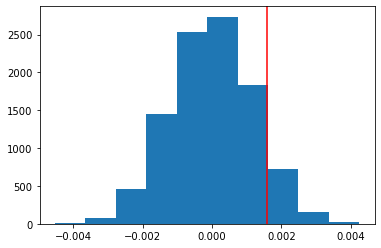

In [76]:
# we can have a better look in the distribution
plt.hist(p_diffs);
plt.axvline(x=obs_conversion_diff, color='red');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>In part **j** we computed the p-value for our A/B Test. Assuming our $H_0$ hypothesis is true (i.e. there is no difference between the new and the old landing page). We calculated the probability of observing a given value (in our case the actual observed difference between the conversion rates of the old page and the new).
>
>The calculated p-value is almost 0.9, which means: with a probability of 90% we will find the actual observed value or more in the null hypothesis. By setting our type I Error threshold to 5% ($\alpha = 0.05$) we clearly fail to reject the $H_0$ hypothesis.
>
>In other words, we don't see a statistical significant improvement of the conversion rate due to the new landing page. However, this conclusion is based on the whole time of the experiment and therefore is subjective to change aversion and/or the novelty effect.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [77]:
import statsmodels.api as sm

convert_old = df_mod.query('converted == 1 & landing_page == "old_page"')['user_id'].count()
convert_new = df_mod.query('converted == 1 & landing_page == "new_page"')['user_id'].count()
n_old = df_mod.query('landing_page == "old_page"')['user_id'].count()
n_new = df_mod.query('landing_page == "new_page"')['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [83]:
stat, pval = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
pval

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The calculated p-value in j matches the p-value calculated with a z-core. In both cases it is clear that we fail to reject the $H_0$ hypothesis. So there is no statistical signifcance between the old and new landing page. However, as mentioned before, this result is subject to the novelty effect and change aversion

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>This is clearly a logistic regression problem

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [91]:
# create dummy variables and label treatment as "ab_page"
df_mod[['control', 'ab_page']] = pd.get_dummies(df_mod.group)
# create an intercept "variable"
df_mod['intercept'] = 1
#check that thinks worked out
df_mod.head(2)

,index,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [92]:
logit_model = sm.Logit(df_mod.converted, df_mod[['intercept', 'ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [93]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        11:41:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

In [97]:
# let us interpret the results
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [98]:
1/_

intercept    7.306593
ab_page      1.015102
dtype: float64

>From the regression results it seems that people who see the new landing page are 1% more likely to convert compare to the baseline (old landing page). However, the p-value for this paramater is to high, which means we fail to reject that the effect of `ab_test` in the conversion rate is $\neq$ 0.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>The "customer journy" a customer goes through depends on many variables. We can control some of them and some not. For example, if the e-commerce company operates in different countries, buying behaviour could vary greatly between these. This is an exogenous factor that we cannot control, however, it has some explanation power for the conversion rate. Just like this feature, i could start listing a bunch of further features, that could help us figure out if the new landing page has trully no effect in the conversion rate. 
>
>Just adding more and more variables to the dataset could also bring some disadvantages. One is particular is multicollinearity. As we increase the number of features, it is more likely that two or more of these variables are linearly correlated. Thus, jeopardising the prediction power of the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [102]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df_mod.set_index('user_id'), how='inner')
df_new.head(4)

,country,index,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page
user_id,,,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,1
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,1
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0


In [103]:
# check in how many countries is the e-commerce firm operating
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [104]:
# add tree dummy variables: one fo the UK, for the US and one for Canada
df_new[['canada', 'uk', 'us']] = pd.get_dummies(df_new.country)
df_new.head(2)

,country,index,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page,canada,uk,us
user_id,,,,,,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,1,0,0,1


In [112]:
# analyze the effect of the contries on the conversion rate. fit the model:
logit_model_country = sm.Logit(df_new.converted, df_new[['intercept', 'us', 'uk']])
results_country = logit_model_country.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [113]:
# get the summary statistics and analyze it:
results_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:               1.521e-05
Time:                        12:35:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
us             0.0408      0.027      1.518      0.129      -0.012       0.093
uk             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

>It seems that only the country the customer comes from does not have an effect on the convertion rate (at least is not statistically significant)

In [114]:
# fit a logistic regression model for all the variables
logit_model2 = sm.Logit(df_new.converted, df_new[['intercept', 'ab_page', 'us', 'uk']])
results2 = logit_model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [115]:
# get the summary and analyze it
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:               2.323e-05
Time:                        12:35:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
us             0.0408      0.027      1.516      0.130      -0.012       0.093
uk             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

>Including the landing page, did not change the statistical significance of the effect of the countries in the conversion rate. On the other hand the type of the landing page did also not not change by including the countries. We cannot reject the $H_0$ hypothesis of any of the variables, i.e.: no variable for itself has an effect in the conversion rate. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [117]:
# create additional columns with higher order variables

# create a column that shows the interaction between country and type of landing page
df_new['uk_ab_page'] = df_new.uk * df_new.ab_page
df_new['us_ab_page'] = df_new.us * df_new.ab_page

# check changes worked
df_new.head()

,country,index,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page,canada,uk,us,uk_ab_page,us_ab_page
user_id,,,,,,,,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0,0,0
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,1,0,0,1,0,1
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,1,0,1,0,1,0
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0,0,0
710616,UK,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,1,0,1,0,1,0


In [119]:
# fit the regression:
logit_model3 = sm.Logit(df_new.converted, df_new[['intercept', 'ab_page', 'us', 'uk', 'us_ab_page', 'uk_ab_page']])
results3 = logit_model3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [120]:
# get the summary and analyze it:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        12:47:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
us             0.0175      0.038      0.465      0.642      -0.056       0.091
uk             0.0118      0.040      0.296      0.767      -0.066       0.090
us_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
uk_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

>Unfortunately, the new variables (higher order) also fail to reject the $H_0$ hypothesis since their p-values are too high. Meaning they do not (statistically speaking) have an effect on the convertion rate.
>
>However, one question remains open: Is there a change aversion or novelty effect that we can filter out if we take the time into account? I say, let's try!

In [122]:
# little refreshment in the data types of the variables
df_new.dtypes

country                 object
index                    int64
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
control                  uint8
treatment                uint8
intercept                int64
ab_page                  uint8
canada                   uint8
uk                       uint8
us                       uint8
uk_ab_page               uint8
us_ab_page               uint8
dtype: object

In [ ]:
# since I do not know how to perform a time series analaysis I will create 3 new
# dummy variables for the time: week_one, week_two and week_three

# first import timedelta to better handel the dates
from datetime import timedelta

In [154]:
# create the first column:
df_new['week_one'] = np.where(df_new.timestamp <= (df_new.timestamp.min() + timedelta(7)), 1, 0)

# check the changes
df_new.head()

,country,index,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page,canada,uk,us,uk_ab_page,us_ab_page,week_one
user_id,,,,,,,,,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0,0,0,0
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,1,0,0,1,0,1,0
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,1,0,1,0,1,0,0
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0,0,0,0
710616,UK,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,1,0,1,0,1,0,0
909908,UK,120612,2017-01-06 20:44:26.334764,treatment,new_page,0,0,1,1,1,0,1,0,1,0,1
811617,US,130400,2017-01-02 18:42:11.851370,treatment,new_page,1,0,1,1,1,0,0,1,0,1,1
938122,US,168052,2017-01-10 09:32:08.222716,treatment,new_page,1,0,1,1,1,0,0,1,0,1,0
887018,US,111071,2017-01-06 11:09:40.487196,treatment,new_page,0,0,1,1,1,0,0,1,0,1,1


In [157]:
# create the second column:
df_new['week_two'] = np.where((df_new.timestamp > (df_new.timestamp.min() + timedelta(7))) & (df_new.timestamp <= (df_new.timestamp.min() + timedelta(14))), 1, 0)

# check the changes
df_new.head()

,country,index,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page,canada,uk,us,uk_ab_page,us_ab_page,week_one,week_two
user_id,,,,,,,,,,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0,0,0,0,1
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,1,0,0,1,0,1,0,0
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,1,0,1,0,1,0,0,0
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0,0,0,0,0
710616,UK,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,1,0,1,0,1,0,0,1
909908,UK,120612,2017-01-06 20:44:26.334764,treatment,new_page,0,0,1,1,1,0,1,0,1,0,1,0
811617,US,130400,2017-01-02 18:42:11.851370,treatment,new_page,1,0,1,1,1,0,0,1,0,1,1,0
938122,US,168052,2017-01-10 09:32:08.222716,treatment,new_page,1,0,1,1,1,0,0,1,0,1,0,1
887018,US,111071,2017-01-06 11:09:40.487196,treatment,new_page,0,0,1,1,1,0,0,1,0,1,1,0


In [158]:
# create the third column:
df_new['week_three'] = np.where(df_new.timestamp > (df_new.timestamp.min() + timedelta(14)), 1, 0)

# check the changes
df_new.head()

,country,index,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page,canada,uk,us,uk_ab_page,us_ab_page,week_one,week_two,week_three
user_id,,,,,,,,,,,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0,0,0,0,1,0
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,1,0,0,1,0,1,0,0,1
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,1,0,1,0,1,0,0,0,1
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0,0,0,0,0,1
710616,UK,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,1,0,1,0,1,0,0,1,0
909908,UK,120612,2017-01-06 20:44:26.334764,treatment,new_page,0,0,1,1,1,0,1,0,1,0,1,0,0
811617,US,130400,2017-01-02 18:42:11.851370,treatment,new_page,1,0,1,1,1,0,0,1,0,1,1,0,0
938122,US,168052,2017-01-10 09:32:08.222716,treatment,new_page,1,0,1,1,1,0,0,1,0,1,0,1,0
887018,US,111071,2017-01-06 11:09:40.487196,treatment,new_page,0,0,1,1,1,0,0,1,0,1,1,0,0


In [159]:
# one last check that everything worked correctly:
(df_new.week_one + df_new.week_two + df_new.week_three).mean()

1.0

In [162]:
# fit the new dummy dates to see their relation to the conversion rate
logit_model_time = sm.Logit(df_new.converted, df_new[['intercept', 'week_two', 'week_three']])
results_time = logit_model_time.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [163]:
# get the summary and analyze results
results_time.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:               2.266e-05
Time:                        13:51:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08975
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0067      0.010   -197.195      0.000      -2.027      -1.987
week_two       0.0018      0.014      0.128      0.898      -0.026       0.030
week_three     0.0269      0.014      1.942      0.052      -0.000       0.054
==============================================================================
"""

The time variables seem to have no effect by themselves. Let's check the `ab_page` as well

In [164]:
logit_model_all = sm.Logit(df_new.converted, df_new[['intercept', 'ab_page', 'week_two', 'week_three']])
results_all = logit_model_all.fit()
results_all.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:               3.070e-05
Time:                        14:06:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08838
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9992      0.012   -171.377      0.000      -2.022      -1.976
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
week_two       0.0018      0.014      0.126      0.900      -0.026       0.030
week_three     0.0269      0.014      1.939      0.052      -0.000       0.054
==============================================================================
"""

The p-values of the features are not improving. However, we should check how these variables depend on each other. For this we will create a higher order regression

In [165]:
# create new columns:
df_new['week2_ab_page'] = df_new['ab_page'] * df_new['week_two']
df_new['week3_ab_page'] = df_new['ab_page'] * df_new['week_three']

# check the results
df_new.head()

,country,index,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page,canada,uk,us,uk_ab_page,us_ab_page,week_one,week_two,week_three,week2_ab_page,week3_ab_page
user_id,,,,,,,,,,,,,,,,,,,,
834778,UK,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
928468,US,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,1,0,0,1,0,1,0,0,1,0,1
822059,UK,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,1,0,1,0,1,0,0,0,1,0,1
711597,UK,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
710616,UK,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,1,0,1,0,1,0,0,1,0,1,0


In [166]:
# let's fit the model
logit_model_final = sm.Logit(df_new.converted, df_new[['intercept', 'ab_page', 'week_two', 'week_three', 'week2_ab_page', 'week3_ab_page']])
results_final = logit_model_final.fit()
results_final.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:               3.080e-05
Time:                        14:14:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2560
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -1.9985      0.014   -139.071      0.000      -2.027      -1.970
ab_page          -0.0164      0.020     -0.808      0.419      -0.056       0.023
week_two          0.0016      0.020      0.077      0.938      -0.038       0.041
week_three        0.0251      0.020      1.282      0.200      -0.013       0.063
week2_ab_page     0.0005      0.029      0.017      0.987      -0.056       0.057
week3_ab_page     0.0036      0.028      0.130      0.896      -0.051       0.058
=================================================================================
"""

In this case the regession still shows that the features are not statistically signifacant and therefore an effect on the conversion rate cannot be supported.

### Now I would like to perform an A/B Test in the different weeks:

In [167]:
# get the difference in the conversion rate between control and treatment for the first week
# after the experiment started

df_week1 = df_new.query('week_one == 1')
obs_conv_control_w1 = df_week1.query('group == "control"')['converted'].mean()
obs_conv_treatment_w1 = df_week1.query('group == "treatment"')['converted'].mean()
obs_diff_w1 = obs_conv_control_w1 - obs_conv_treatment_w1
print(obs_diff_w1)

0.0017173727899199853


In [168]:
# get the difference in the conversion rate between control and treatment for the second week
# after the experiment started
df_week2 = df_new.query('week_two == 1')
obs_conv_control_w2 = df_week2.query('group == "control"')['converted'].mean()
obs_conv_treatment_w2 = df_week2.query('group == "treatment"')['converted'].mean()
obs_diff_w2 = obs_conv_control_w2 - obs_conv_treatment_w2
print(obs_diff_w2)

0.0016699483739971849


In [169]:
# get the difference in the conversion rate between control and treatment for the third week
# after the experiment started
df_week3 = df_new.query('week_three == 1')
obs_conv_control_w3 = df_week3.query('group == "control"')['converted'].mean()
obs_conv_treatment_w3 = df_week3.query('group == "treatment"')['converted'].mean()
obs_diff_w3 = obs_conv_control_w3 - obs_conv_treatment_w3
print(obs_diff_w3)

0.0013669318338788289


Even though the difference in the observed conversion for the third week seems to show a somehow better results for the new landing page, it is most likely not the case. I will perform a confidence interval analysis as well as a p-value analysis to make sure the null hypotesis for the third week of the experiment cannot be rejected. As a reminder of the null hypothesis:

$$H_0: p_{old} \geq p_{new} \Longrightarrow p_{old} - p_{new} \geq 0$$
$$H_1: p_{old} < p_{new}\Longrightarrow p_{old} - p_{new} < 0$$

In [176]:
# Use the sample for bootstrapping:
diffs_w3 = []
for i in range(10000):
    # took a sample of 1000 to accelerate the processing
    boot_samp = df_week3.sample(1000, replace=True) 
    conv_control_w3 = boot_samp.query('group == "control"')['converted'].mean()
    conv_treatment_w3 = boot_samp.query('group == "treatment"')['converted'].mean()
    diffs_w3.append(conv_control_w3 - conv_treatment_w3)

# check the loop worked fine
diffs_w3[:10]

[0.001368662432617393,
 -0.025295326142783778,
 -0.015512062048248176,
 -0.0036802355350742527,
 0.0335454019664546,
 0.0020563512392221817,
 -0.0281851319827624,
 0.037516150064600254,
 -0.022399141819870225,
 -0.013192211075377214]

In [177]:
# define the 95% confidence interval
np.percentile(diffs_w3, 2.5), np.percentile(diffs_w3, 97.5)

(-0.03840877374540952, 0.04230698916717116)

the observed value is definitely int he confidence itnerval, so as expected there is no evidence that support a better performance of the new landing page in the third week. 

To get the p-value we will use the results of the confidence interval. First get the standard deviation of the diffs

In [178]:
# get the standard deviation of the diffs
diffs_std = np.array(diffs_w3).std()

In [179]:
# generate a distribution with the std and the mean under null (0)
null_vals = np.random.normal(0, diffs_std, 10000)

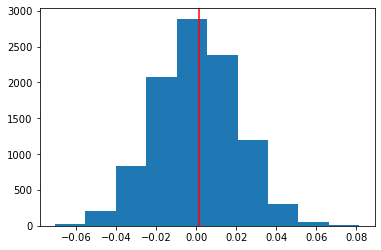

In [181]:
# plot the simulated distribution and the observed value
plt.hist(null_vals);
plt.axvline(x=obs_diff_w3, color='red')

In [183]:
# get the p-value
(obs_diff_w3 > null_vals).mean()

0.5304

As expected, the null value cannot be rejected and thus even in the third week of the experiment no improvement on the conversion rate can be observed.

Based on this dataset and the lack of furhter information, and with the only goal to improve the conversion rate ist cannot be recommended to implement the new landing page. However, it is possible that the reveniew incresed... more data would be needed to perform such analysis 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.